# IMPORTE DE LIBRERIAS NECESARIAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt
import seaborn as sns

# Lectura de los datos de evaluación

In [2]:
datos  = pd.read_csv('evalNucleoKmean2.csv',sep=';',index_col=0)
datos.head()

,CLASE,CELULA,FN,FP,VP,VN,P,R,E,NSR,FM,ER,NRM,JACC,DICE
0,1,normalSup1.jpg,250,0,549,43427,1.000000,0.687109,0.994347,0.000000,0.814540,0.000000,0.156446,0.687109,0.814540
1,1,normalSup10.jpg,246,0,396,107114,1.000000,0.616822,0.997717,0.000000,0.763006,0.000000,0.191589,0.616822,0.763006
2,1,normalSup11.jpg,270,0,430,85430,1.000000,0.614286,0.996865,0.000000,0.761062,0.000000,0.192857,0.614286,0.761062
3,1,normalSup12.jpg,157,2,547,72122,0.996357,0.776989,0.997817,0.003656,0.873105,0.002841,0.112926,0.774788,0.873105
4,1,normalSup13.jpg,351,0,265,46340,1.000000,0.430195,0.992525,0.000000,0.601589,0.000000,0.284903,0.430195,0.601589


# DESCRIPCION GENERAL

In [3]:
datos.describe()

,CLASE,FN,FP,VP,VN,P,R,E,NSR,FM,ER,NRM,JACC,DICE
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,870.000000,870.000000,917.000000,917.000000,917.000000,917.000000
mean,4.577972,1090.451472,291.509269,1890.870229,24580.526718,0.889910,0.655778,0.896926,0.289526,0.769339,0.273192,0.308707,0.616618,0.729908
std,1.816252,1276.584119,2268.151310,1470.157814,34662.896302,0.245834,0.246879,0.101451,4.200207,0.161841,4.089926,2.041735,0.235651,0.231649
min,1.000000,0.000000,0.000000,0.000000,654.000000,0.000000,0.000000,0.375137,0.000000,0.017447,0.000000,0.016793,0.000000,0.000000
25%,3.000000,263.000000,0.000000,917.000000,4848.000000,0.936670,0.528522,0.851371,0.000000,0.692135,0.000000,0.101162,0.496051,0.663147
50%,5.000000,650.000000,4.000000,1559.000000,9743.000000,0.998032,0.694740,0.923433,0.001324,0.795315,0.001555,0.186433,0.646806,0.785528
75%,6.000000,1408.000000,138.000000,2505.000000,27411.000000,1.000000,0.855057,0.974723,0.036396,0.895478,0.051271,0.269318,0.800927,0.889461
max,7.000000,9585.000000,64765.000000,10139.000000,229608.000000,1.000000,1.000000,0.999642,112.634783,0.983064,112.634783,56.317391,0.966693,0.983064


# Etiquetado de cada célula según las distintas nomeclaturas

In [4]:
#2 Clases(normal,Anormal)
binario = []
for ind, ele in enumerate(datos['CLASE']):
    if ele == 1 or ele == 2 or ele == 3:
        binario.append('1_NORMAL')
    if ele == 4 or ele == 5 or ele == 6 or ele == 7:
        binario.append('2_ANORMAL')
datos['BIN'] = binario

# tres clases,  Corriente citologíca
#normal, lsil,hsil
cytology = []
for ind, ele in enumerate(datos['CLASE']):
    if ele == 1 or ele == 2 or ele == 3:
         cytology.append('1_NORMAL')
    if ele == 4:
        cytology.append('2_LSIL')
    if ele == 5 or ele == 6 or ele == 7:
        cytology.append('3_HSIL')
datos['CYT'] = cytology


# cuatro  clases, corriente Histológica
#normal, CIN1,CIN2,CIN3
cytology = []
for ind, ele in enumerate(datos['CLASE']):
    if ele == 1 or ele == 2 or ele == 3:
         cytology.append('1_NORMAL')
    if ele == 4:
        cytology.append('2_CIN1')
    if ele == 5:
        cytology.append('3_CIN2')
    if ele == 6 or ele == 7:
        cytology.append('4_CIN3')
datos['HIST'] = cytology

In [5]:
lista = datos['DICE']
for i,e  in enumerate (lista):
    if e == 0.9502040816:
        print("Se encontró el valor",e,"en la columna", i)
        break

In [31]:
puntaje = datos[datos['CLASE'] == 4]
puntaje = puntaje['P'].mean()
print(np.round(puntaje,decimals=3))


0.901


In [36]:
puntaje = datos['R'].mean()
print(np.round(puntaje,decimals=3))

0.656


# ANALISIS DE TENDENCIA CENTRAL

(0.0, 1.0)

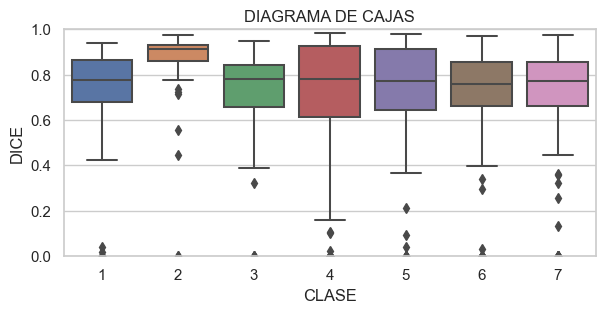

In [6]:
plt.figure(figsize=(7,3),dpi=98)
sns.set(style='whitegrid')
sns.boxplot(x="CLASE",y="DICE",data=datos)
plt.title('DIAGRAMA DE CAJAS')
plt.ylim((0,1))

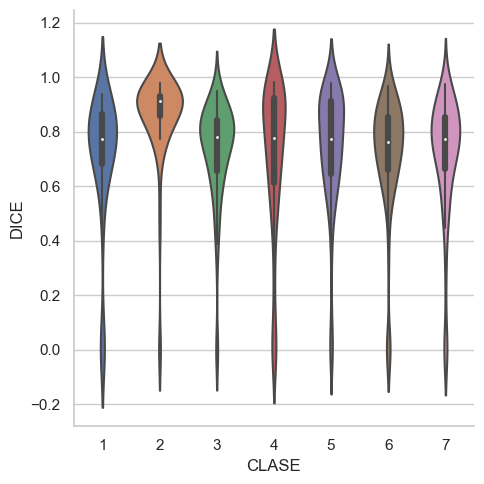

In [7]:
sns.catplot(x='CLASE',y='DICE',data=datos,kind='violin')

(0.0, 1.0)

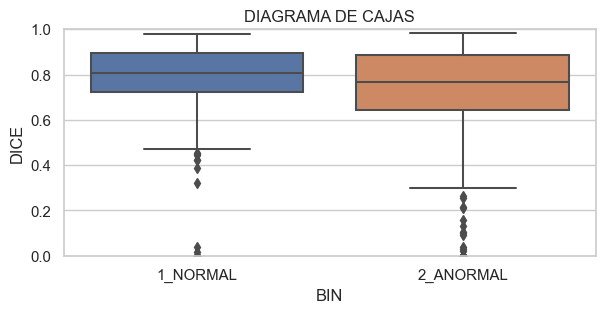

In [8]:
plt.figure(figsize=(7,3),dpi=98)
sns.set(style='whitegrid')
sns.boxplot(x="BIN",y="DICE",data=datos)
plt.title('DIAGRAMA DE CAJAS')
plt.ylim((0,1))